In [13]:
import peakquality as pq
import pickle
import analyzer
from analyzer.datasets import SampleManager
from analyzer.core import AnalysisResult
import numpy as np

from analyzer.plotting import PlotObject, drawAs1DHist

In [2]:
SIGNAL_NAMES = ["signal_312_1000_100", "signal_312_1200_1100", "signal_312_1300_400", "signal_312_1500_1100",
                "signal_312_1500_600", "signal_312_2000_1600", "signal_312_1000_400", "signal_312_1200_400",
                "signal_312_1300_600", "signal_312_1500_1200", "signal_312_1500_900", "signal_312_2000_1700",
                "signal_312_1000_600", "signal_312_1200_600", "signal_312_1400_1300", "signal_312_1500_1300",
                "signal_312_2000_100", "signal_312_2000_1900", "signal_312_1000_700", "signal_312_1200_700",
                "signal_312_1400_400", "signal_312_1500_1350", "signal_312_2000_1200", "signal_312_2000_400",
                "signal_312_1000_800", "signal_312_1200_800", "signal_312_1400_600", "signal_312_1500_1400",
                "signal_312_2000_1300", "signal_312_2000_600", "signal_312_1000_900", "signal_312_1200_900",
                "signal_312_1500_1000", "signal_312_1500_1450", "signal_312_2000_1400", "signal_312_2000_900",
                "signal_312_1200_1000", "signal_312_1300_1200", "signal_312_1500_100", "signal_312_1500_400",
                "signal_312_2000_1500"]

In [3]:
s = SampleManager()
s.loadSamplesFromDirectory("datasets/")

In [4]:
a = AnalysisResult.fromFile("outputs.pkl")
hists = a.getMergedHistograms(s)

In [39]:
a.results[]

<function dict.values>

In [46]:
a.getMergedHistograms(s.getCollection("Skim_QCDInclusive2018"))

TypeError: 'SampleCollection' object is not subscriptable

In [20]:
xvar = "m13_m"
background_style = s.getCollection("Skim_QCDInclusive2018").style
bg_hists = a.results["Skim_QCDInclusive2018"].getScaledHistograms(s, 10)
background_obj = PlotObject.fromHist(bg_hists["m13_m"], style=background_style)

KeyError: 'Skim_QCDInclusive2018'

signal_312_1000_100 100
0.0
signal_312_1200_1100 1100
17.292773056973832
signal_312_1300_400 400
0.0
signal_312_1500_1100 1100
12.525054890099286
signal_312_1500_600 600
0.7641989269817121
signal_312_2000_1600 1600
5.8561889907131155
signal_312_1000_400 400
1.2
signal_312_1200_400 400
0.0
signal_312_1300_600 600
1.9364916731037085
signal_312_1500_1200 1200
12.796054079285536
signal_312_1500_900 900
6.808450631384502
signal_312_2000_1700 1700
5.811865258054231
signal_312_1000_600 600
5.754997827975264
signal_312_1200_600 600
3.0740852297878796
signal_312_1400_1300 1300
13.809417076763232
signal_312_1500_1300 1300
12.554162656266646
signal_312_2000_100 100
0.0
signal_312_2000_1900 1900
5.519420259411309
signal_312_1000_700 700
11.489125293076057
signal_312_1200_700 700
6.431951492354401
signal_312_1400_400 400
0.0
signal_312_1500_1350 1350
12.274852341270751
signal_312_2000_1200 1200
3.401722677073658
signal_312_2000_400 400
0.0
signal_312_1000_800 800
17.01336373133031
signal_312_1200_8

/tmp/ipykernel_1107959/2073054853.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


signal_312_1400_600 600
1.1832159566199232
signal_312_1500_1400 1400
11.842001520013413
signal_312_2000_1300 1300
4.5201769876853275
signal_312_2000_600 600
0.25298221281347033
signal_312_1000_900 900
18.973665961010276
signal_312_1200_900 900
16.052102666006096
signal_312_1500_1000 1000
10.238554585487153
signal_312_1500_1450 1450
9.707883394437738
signal_312_2000_1400 1400
5.376988004450075
signal_312_2000_900 900
0.9959919678390986
signal_312_1200_1000 1000
17.07893439298834
signal_312_1300_1200 1200
15.793986197284081
signal_312_1500_100 100
0.0
signal_312_1500_400 400
0.0
signal_312_2000_1500 1500
5.935654976495854


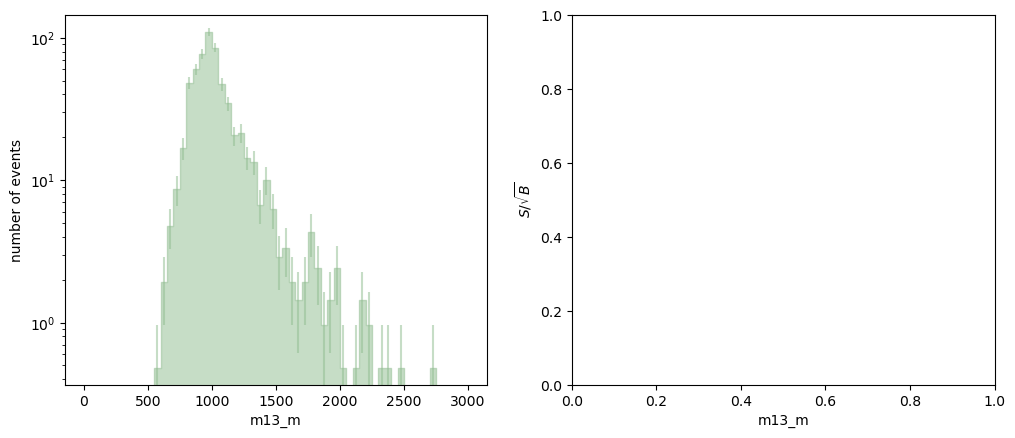

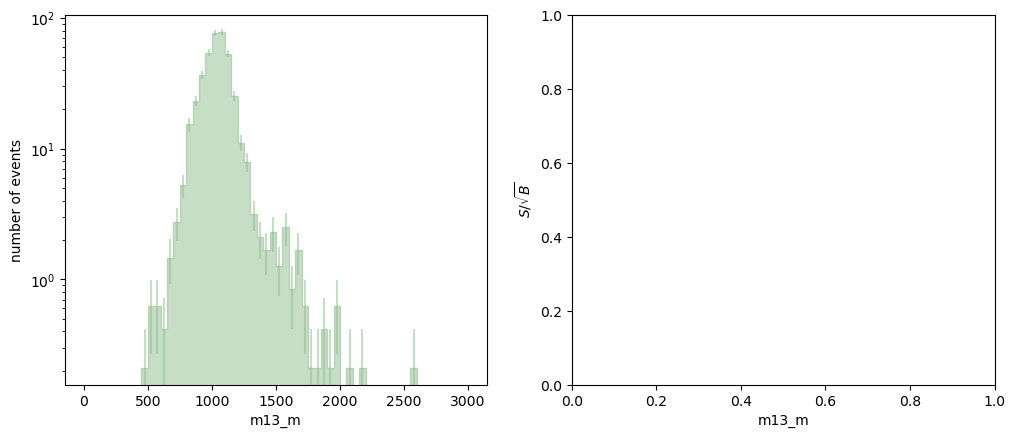

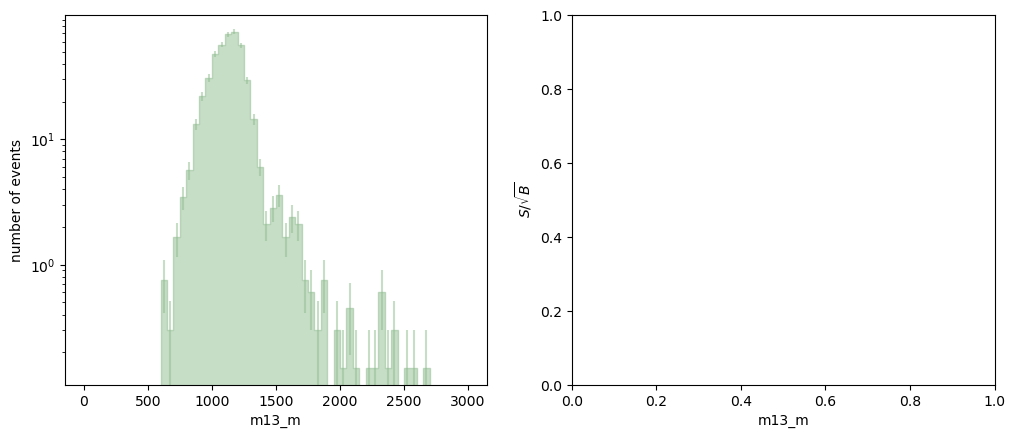

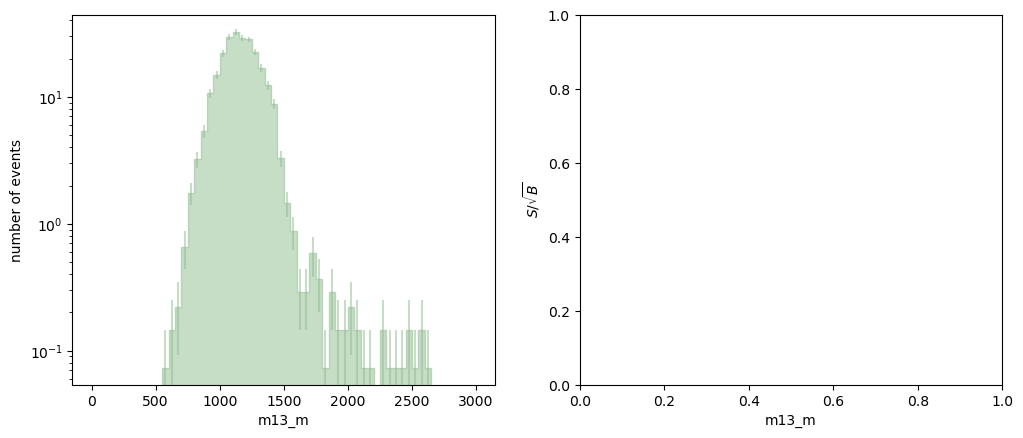

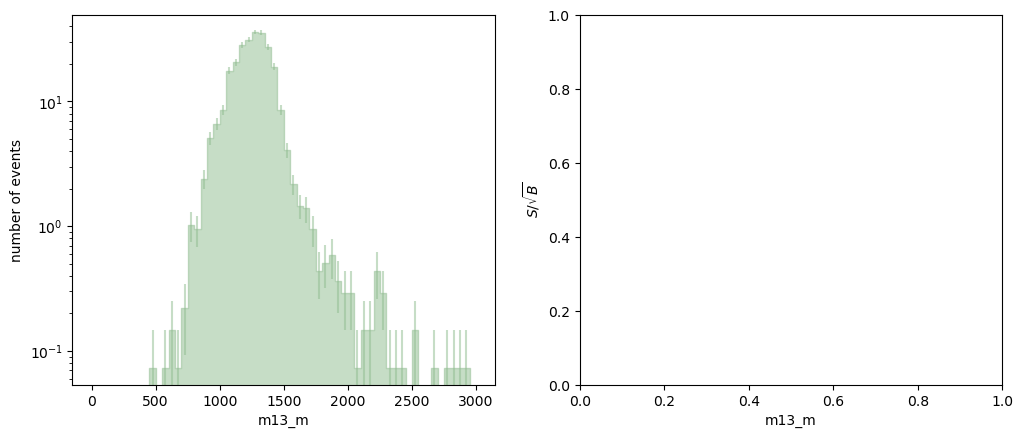

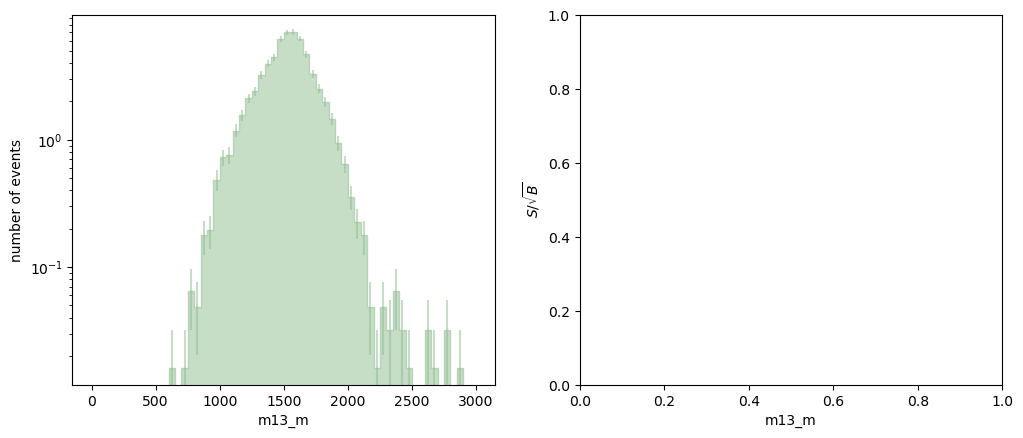

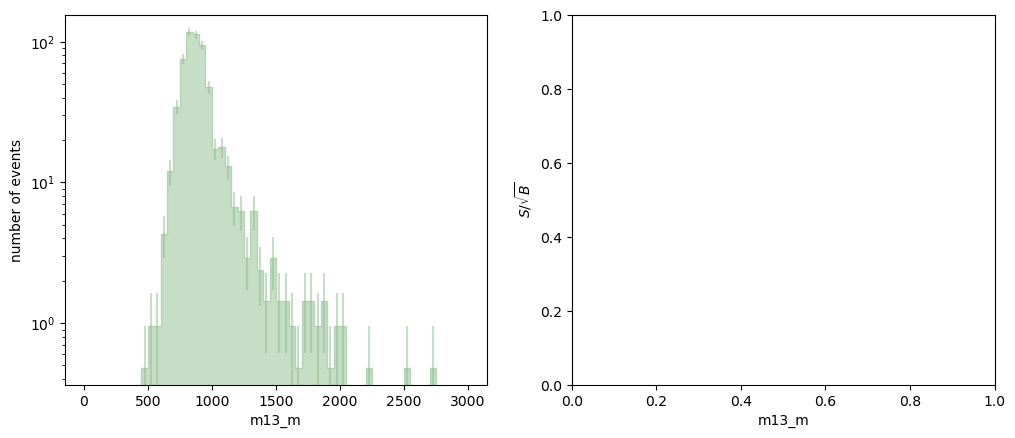

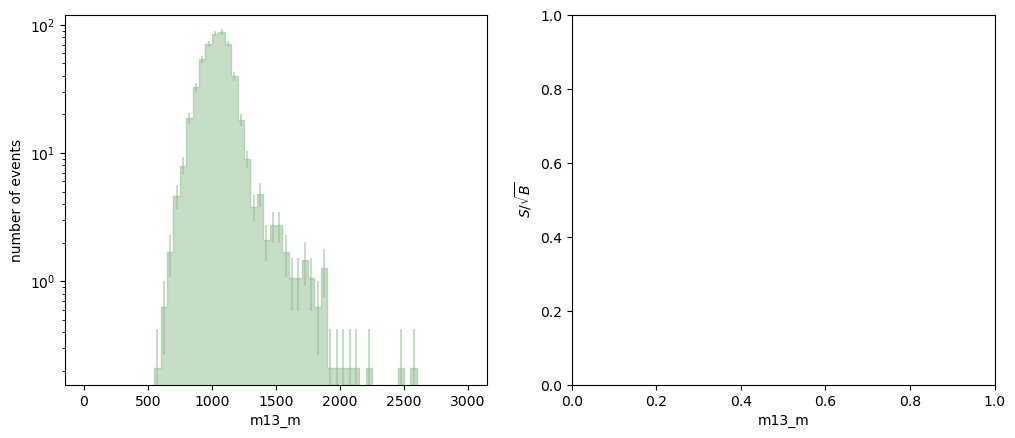

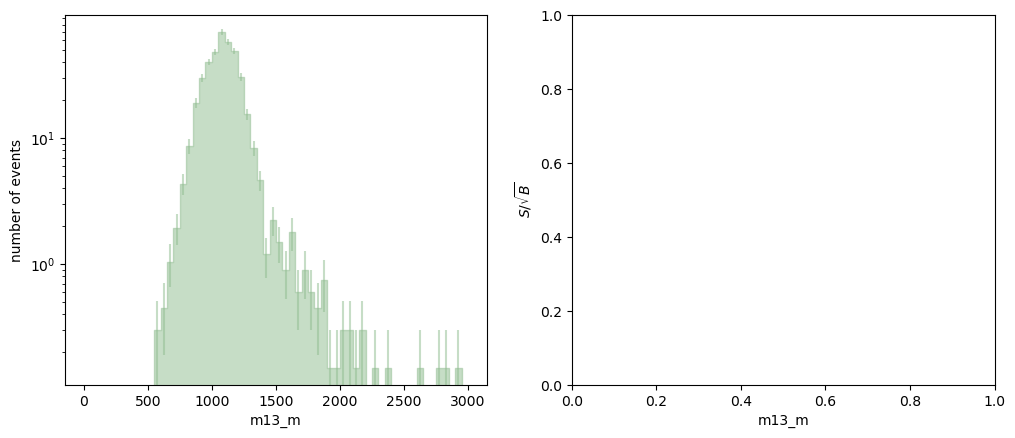

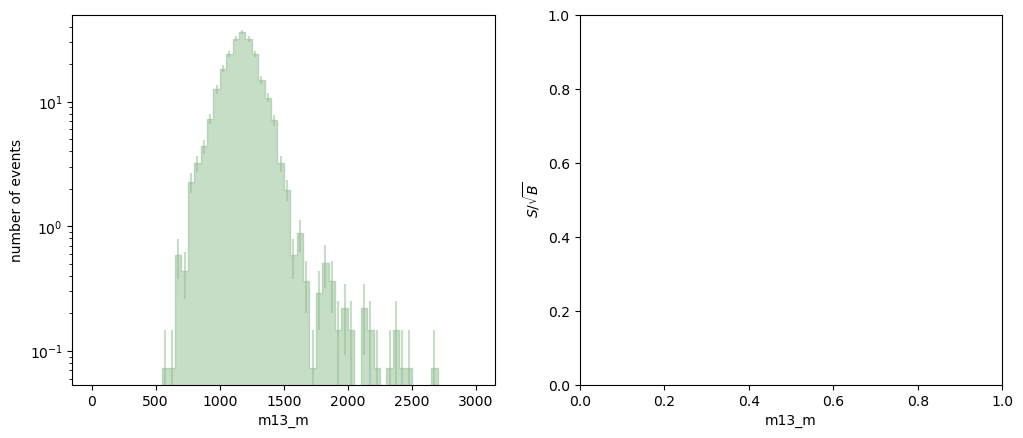

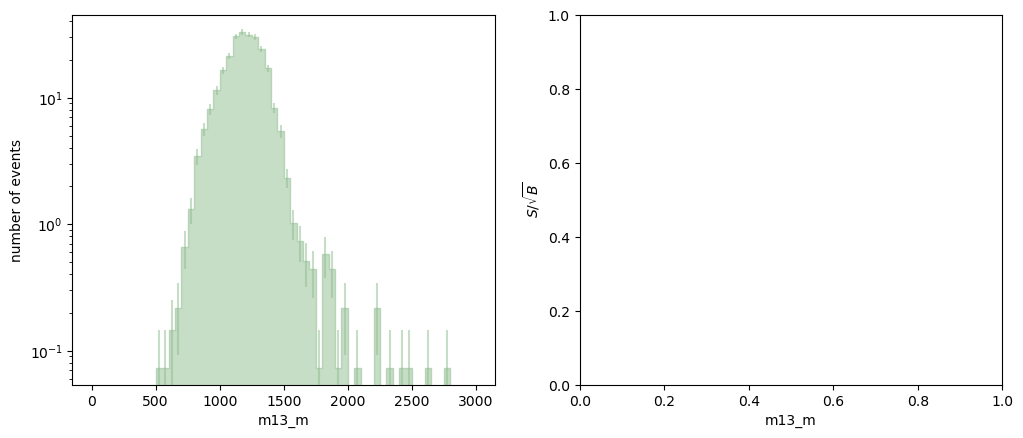

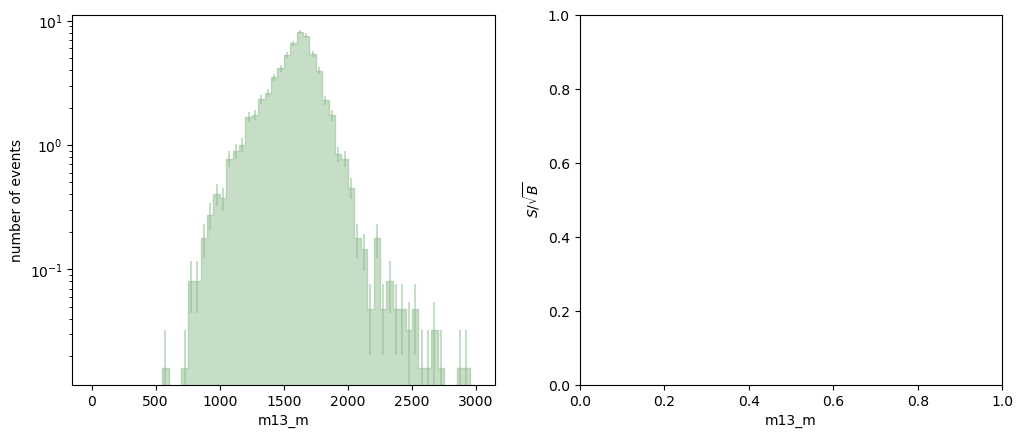

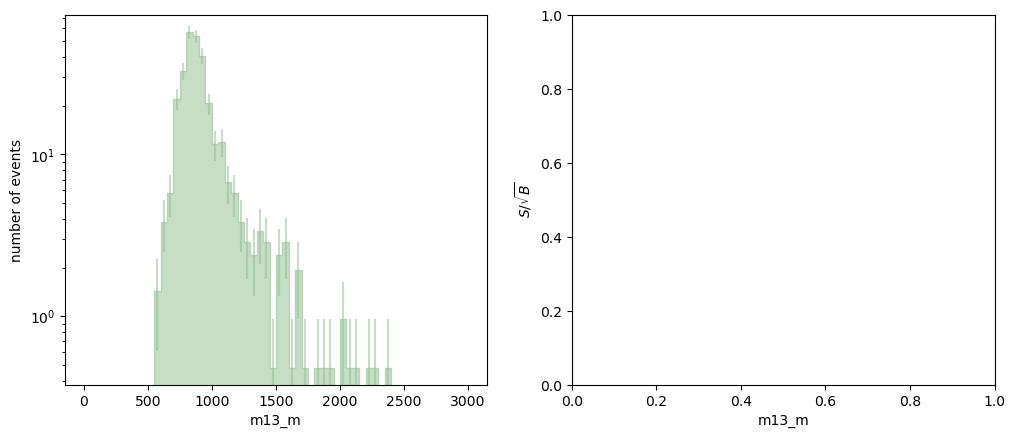

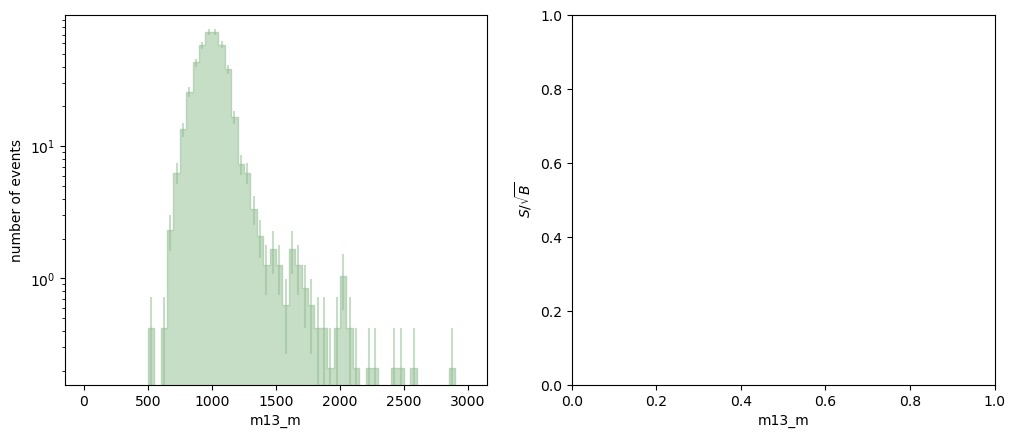

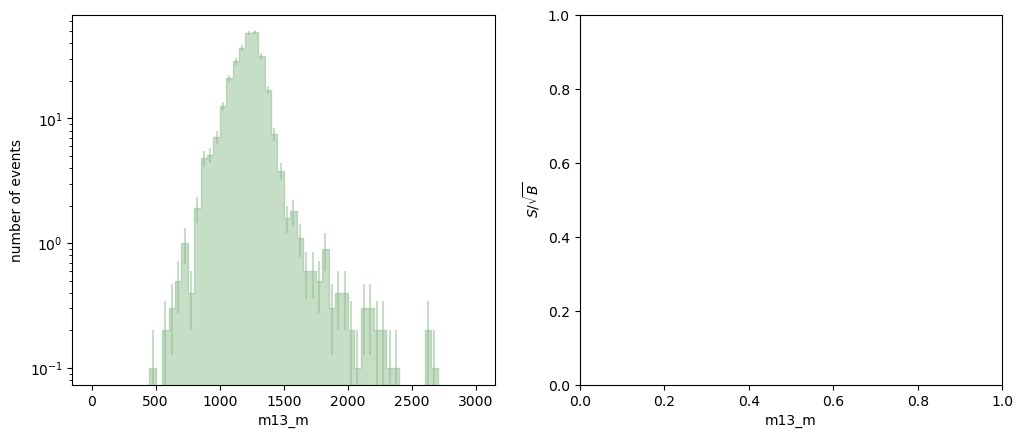

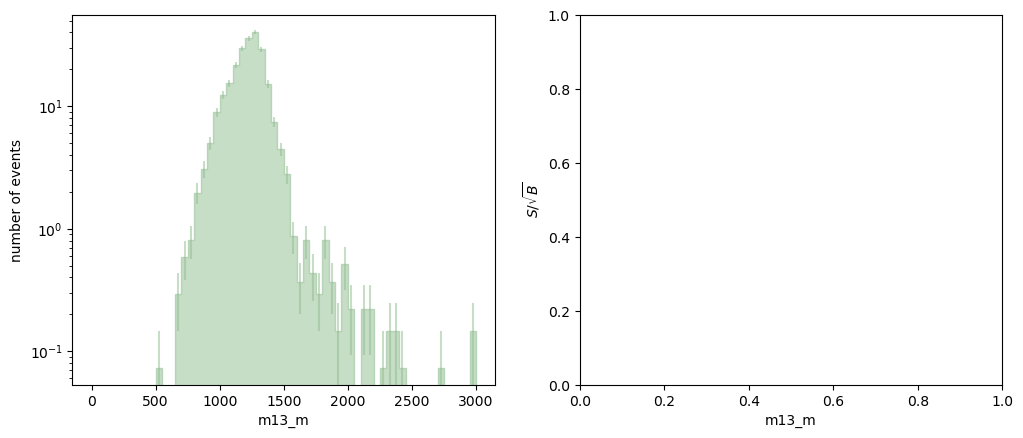

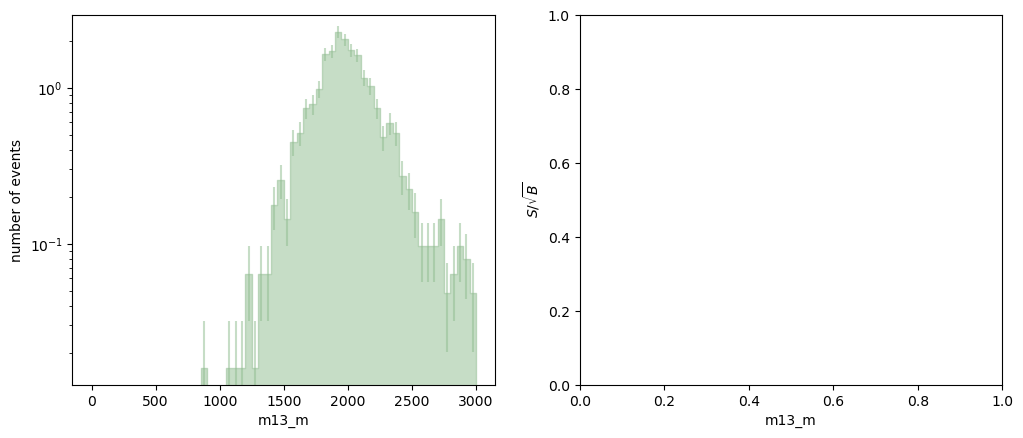

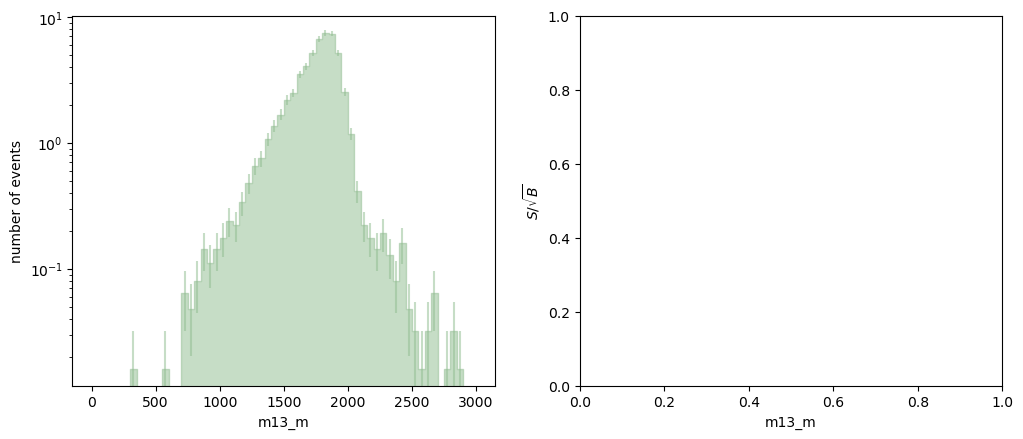

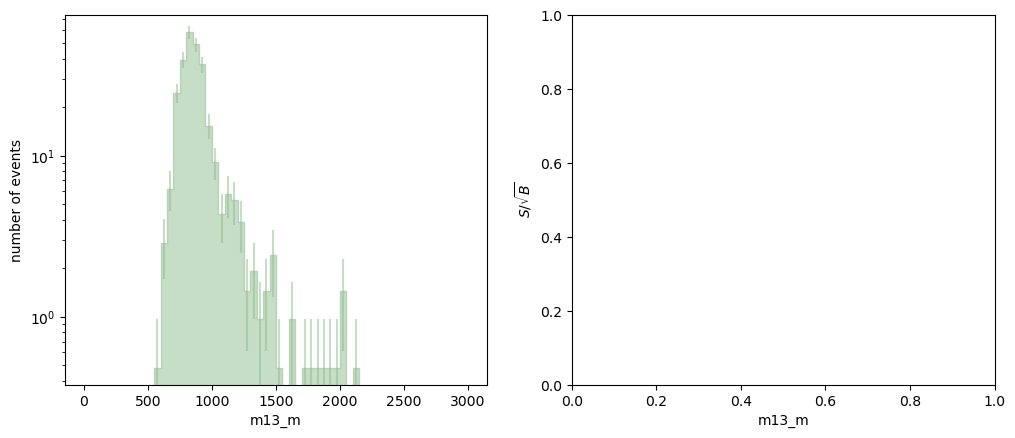

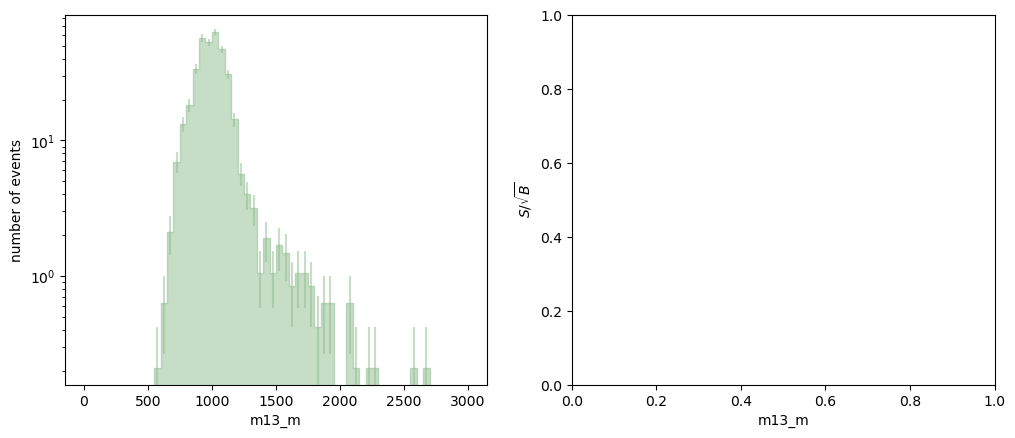

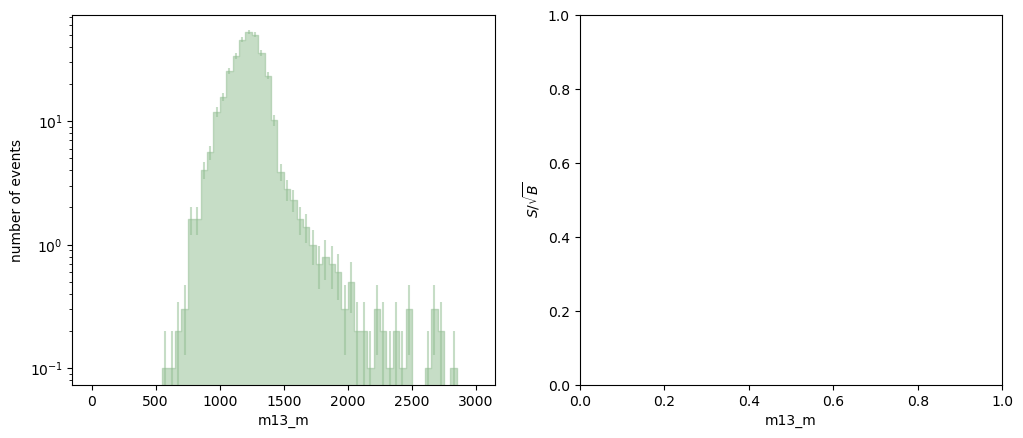

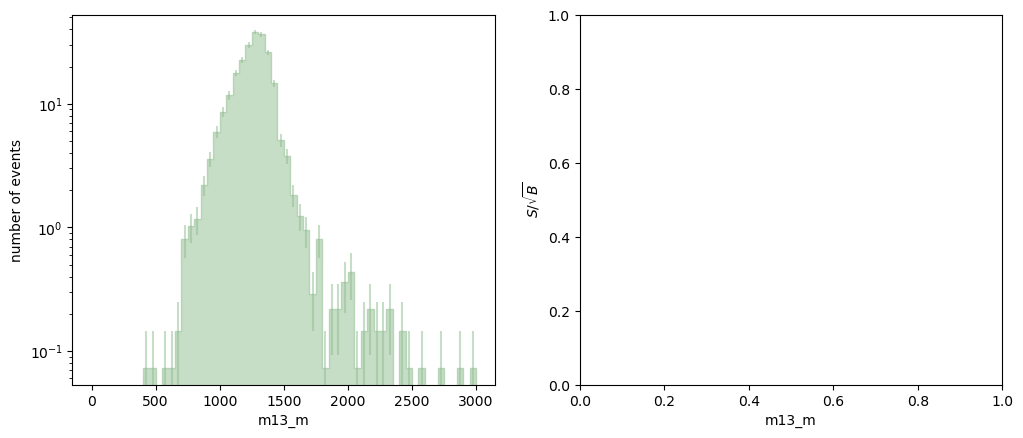

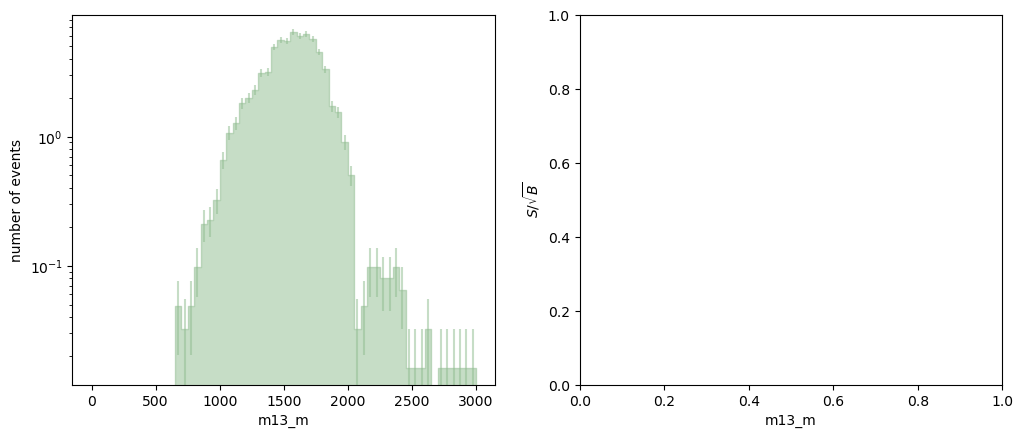

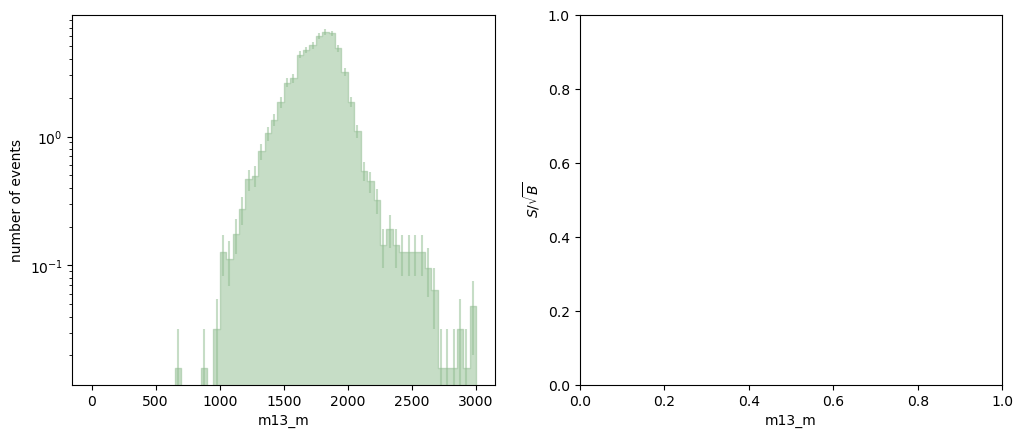

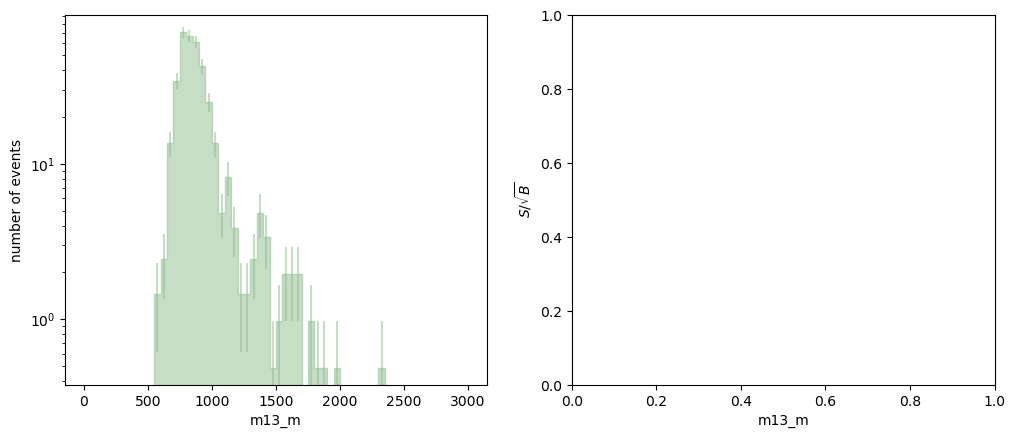

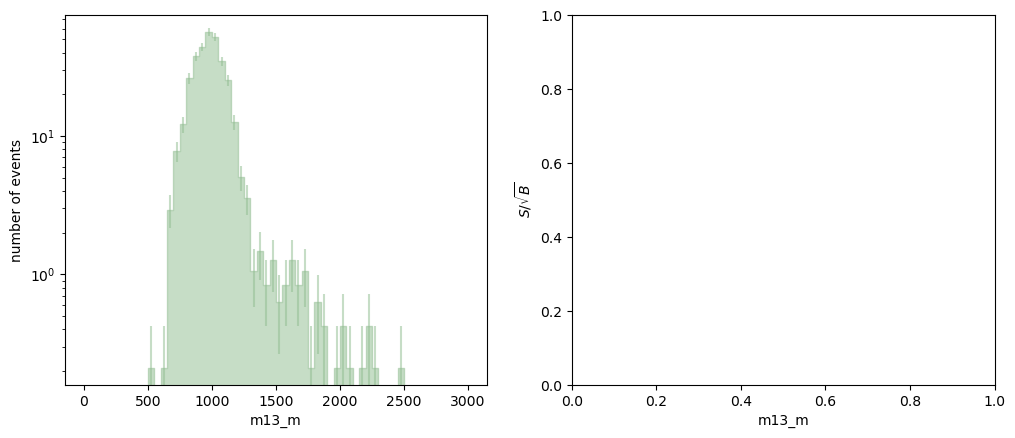

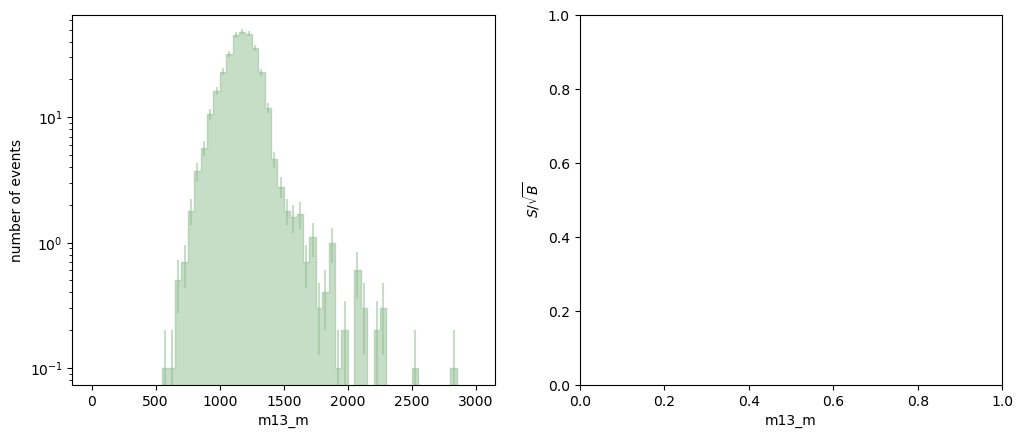

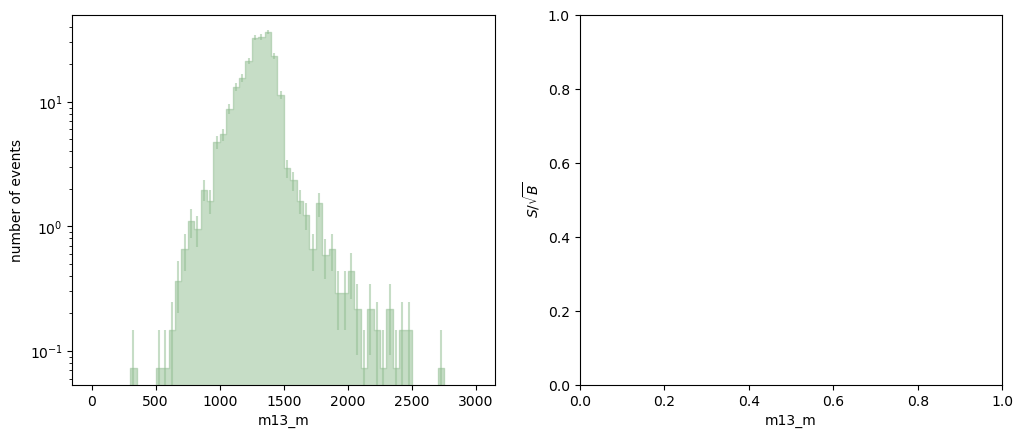

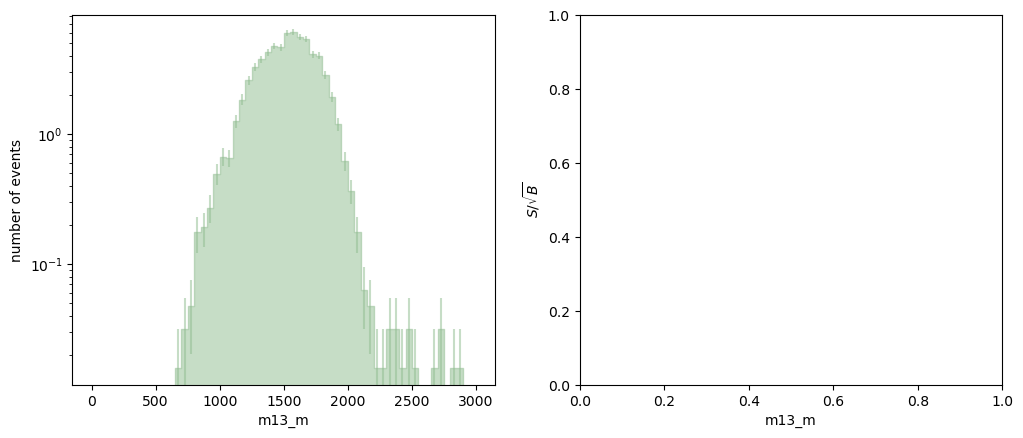

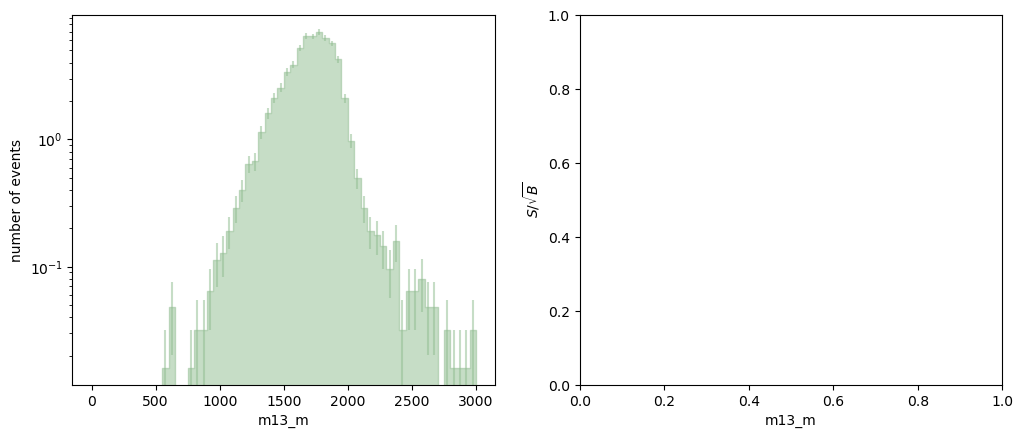

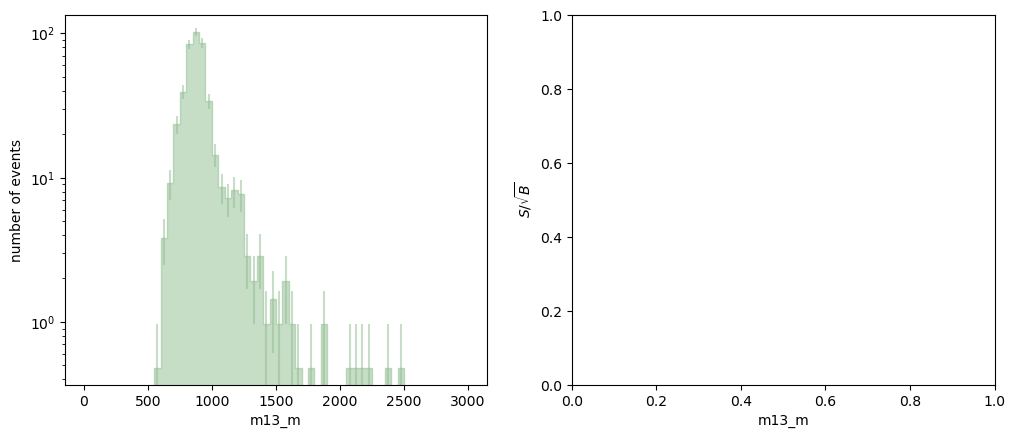

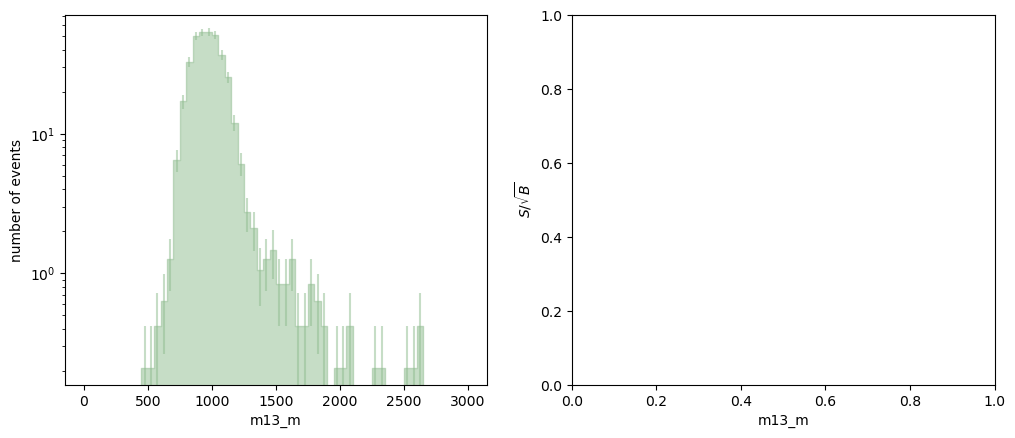

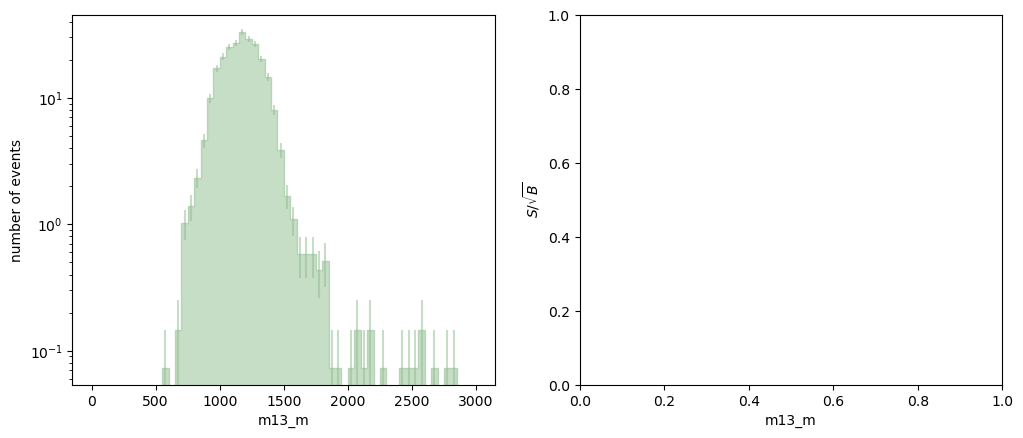

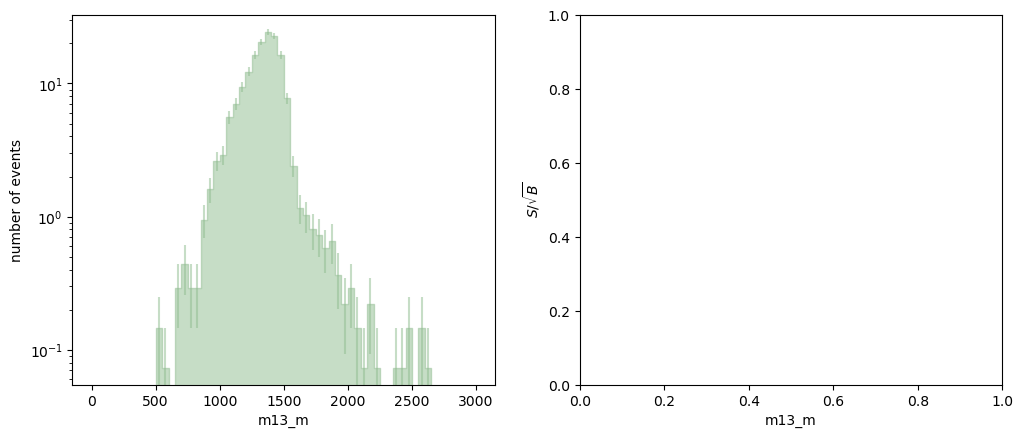

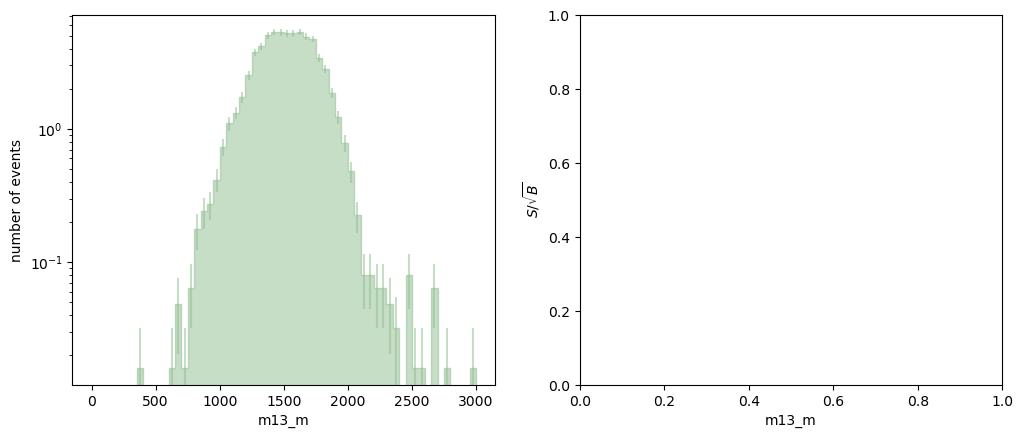

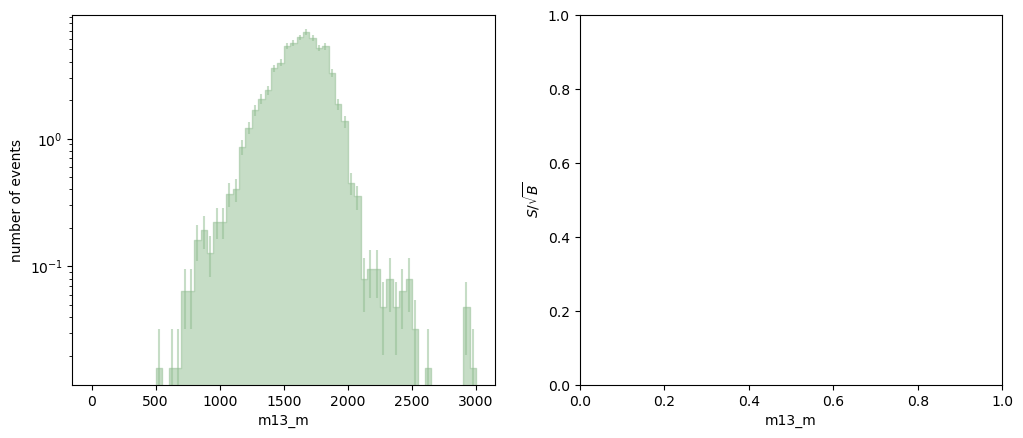

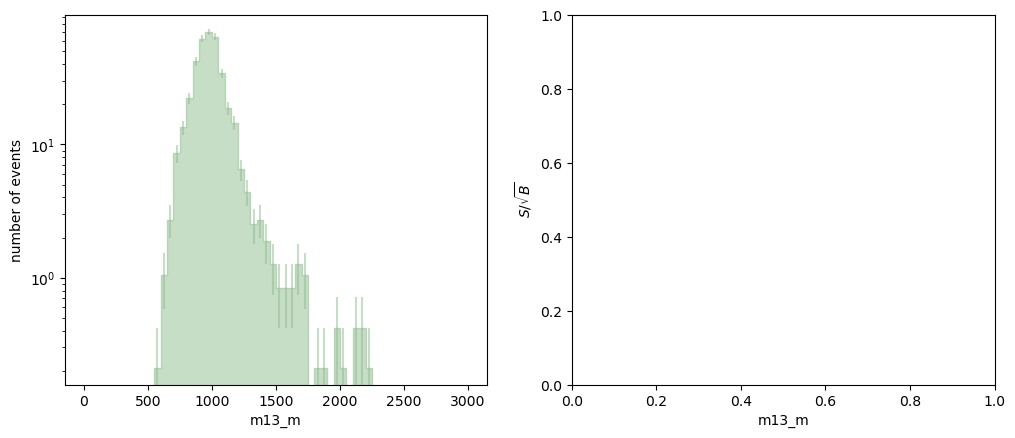

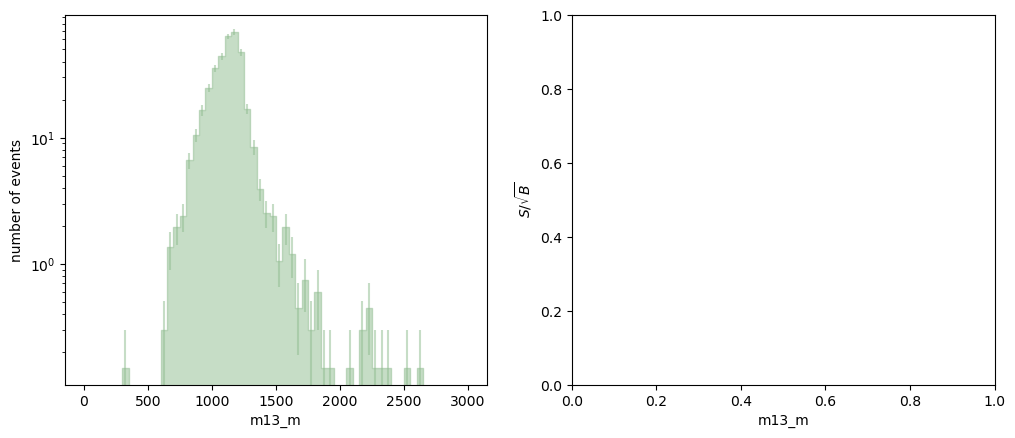

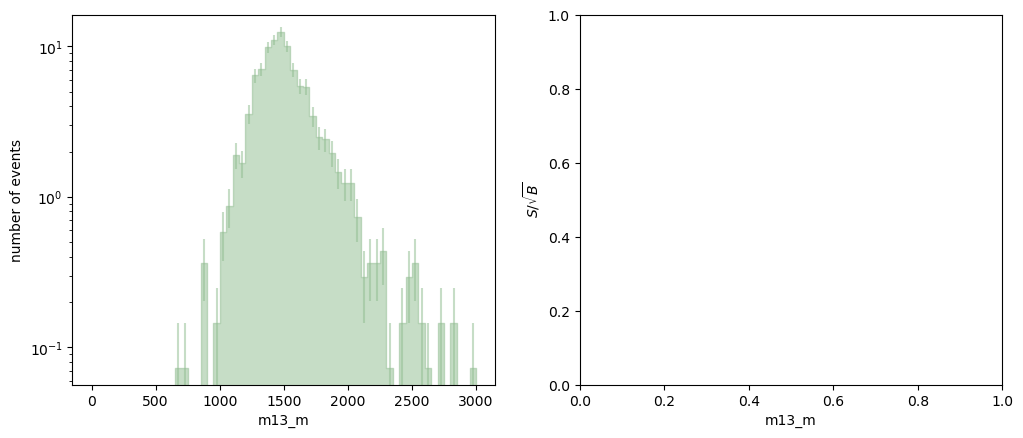

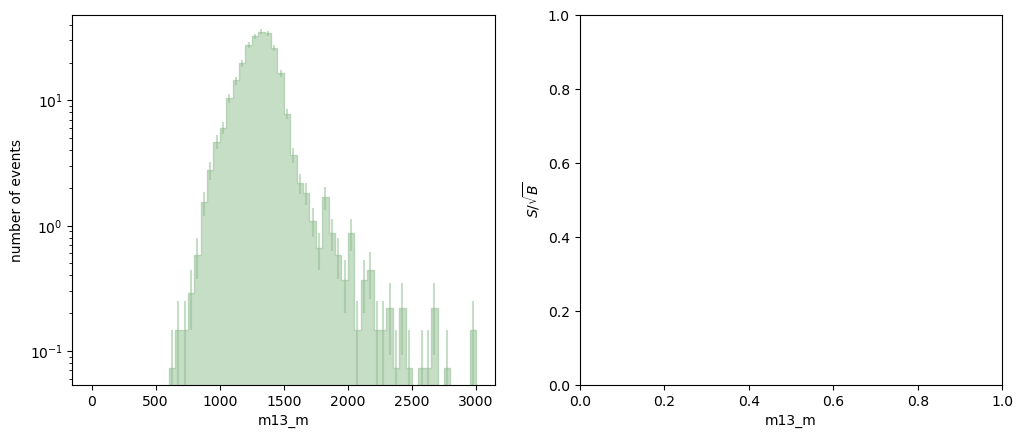

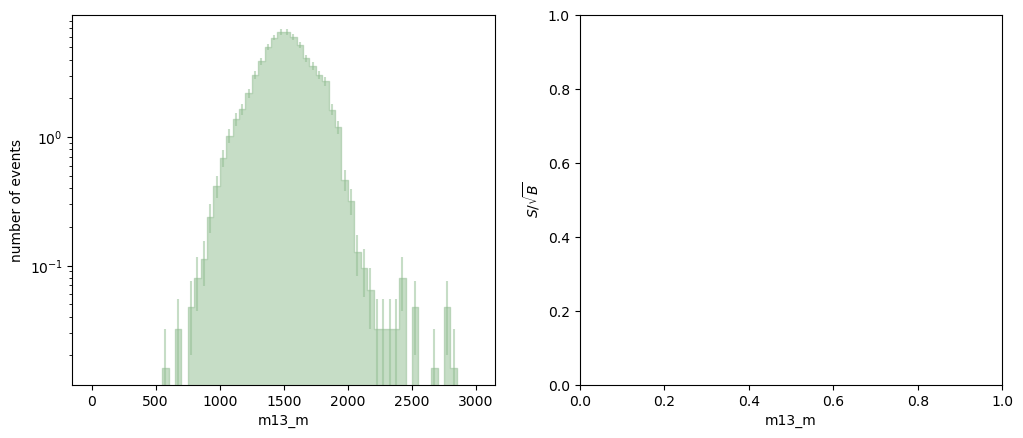

In [16]:
for signal in SIGNAL_NAMES:
    hists = a.results[signal].getScaledHistograms(s, 10)
    signal_name_parts = signal.split('_')
    true_mtop = int(signal_name_parts[-2])
    true_mchi = int(signal_name_parts[-1])
    print(signal, true_mchi)
    print(pq.s_over_root_b(hists, "Skim_QCDInclusive2018", signal, xvar, true_mchi))

    signal_style = s.getSet(signal).style
    background_obj = PlotObject.fromHist(hists[xvar], style=background_style)
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(12)
    ax[0].set_xlabel(xvar)
    ax[0].set_ylabel("number of events")
    ax[0].set_yscale(xvar)
    ax[1].set_xlabel("m13_m")
    ax[1].set_ylabel("$S/\sqrt{B}$")
    ax.set_xlabel(xvar)
    ax.set_ylabel("$S/\sqrt{B}$")
    ax.set_title("Scatter plot of S/sqrt(B)")
    drawAs1DHist(ax[0], background_obj)
    # ax[1].scatter(bin_centers, result)
